In [1]:
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
import math

In [2]:
from nltk.corpus import reuters
from nltk.corpus import wordnet

In [3]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [4]:
reuters_words = [w.lower() for w in reuters.words()]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words]

In [5]:
words_1 = [w for (w, c) in counts]
counts_1 = [c for (w, c) in counts]

In [6]:
count_rank = ss.rankdata([c for (w, c) in counts])
count_rank

array([18567. ,  5513. ,  5513. , ..., 21705.5,  5513. , 13183.5])

In [7]:
counts_ranked = zip(words_1, counts_1, count_rank)
#counts_ranked[100:110]

In [8]:
counts_sorted = sorted(counts_ranked, key=lambda item: item[2])
counts_sorted[20000:20010]

[('refuses', 5, 19949.0),
 ('millimetres', 5, 19949.0),
 ('clears', 5, 19949.0),
 ('intergroup', 5, 19949.0),
 ('thames', 5, 19949.0),
 ('ropak', 5, 19949.0),
 ('accomplished', 5, 19949.0),
 ('forget', 5, 19949.0),
 ('illustrated', 5, 19949.0),
 ('dormant', 5, 19949.0)]

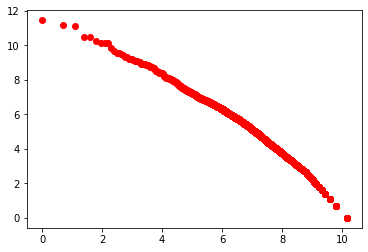

In [9]:
L = len(counts_sorted)
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [10]:
import numpy as np

In [11]:
# generate x and y
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[-1.59893073]
 [16.37719998]]


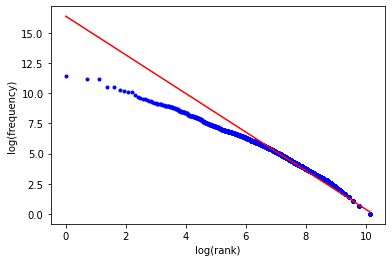

In [12]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

Text(0, 0.5, 'frequency')

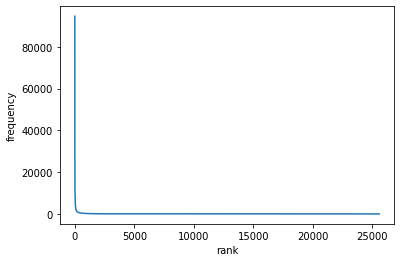

In [13]:
plt.plot([L-r+1 for (_, __, r) in counts_sorted], [c for (_, c, __) in counts_sorted])
plt.xlabel('rank')
plt.ylabel('frequency')


In [14]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

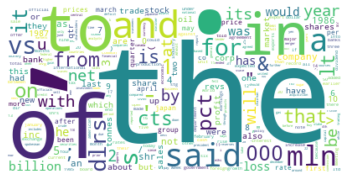

In [15]:
wc = WordCloud(background_color="white", max_words=1000)
# managing frequency dictionary too for wordcloud
freq_dict = {}
for w, c in counts:
  freq_dict[w] = c
# generate word cloud with stopwords
wc.generate_from_frequencies(freq_dict)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


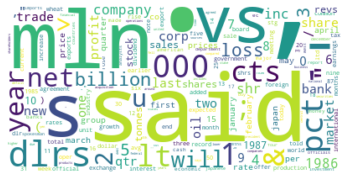

In [17]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    freq_dict_[w] = c

wc = WordCloud(background_color="white")
# generate word cloud without stopwords
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [20]:
def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

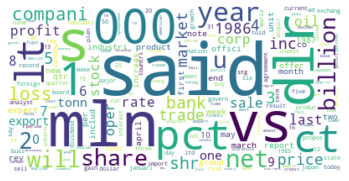

In [21]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      # print(w, porter.stem(w))
      w = porter.stem(w)
      freq_dict_[w] = freq_dict_.get(w, 0) + c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
